# 📘 Notebook de Análise de Imagens para Visão Computacional

Este notebook apresenta um pipeline completo de análise de imagens sem classificação, focado em extrair e visualizar características visuais utilizando OpenCV e matplotlib.

---

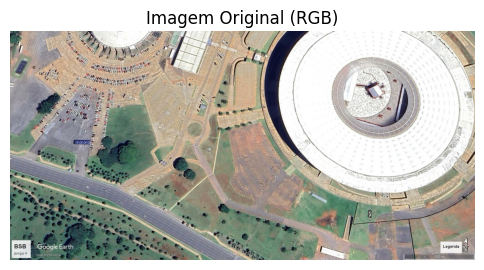

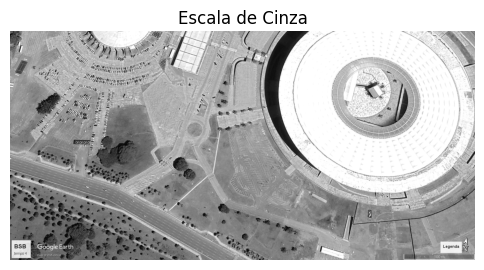

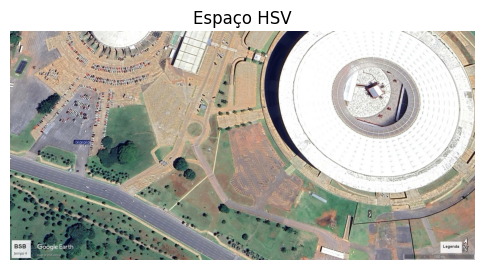

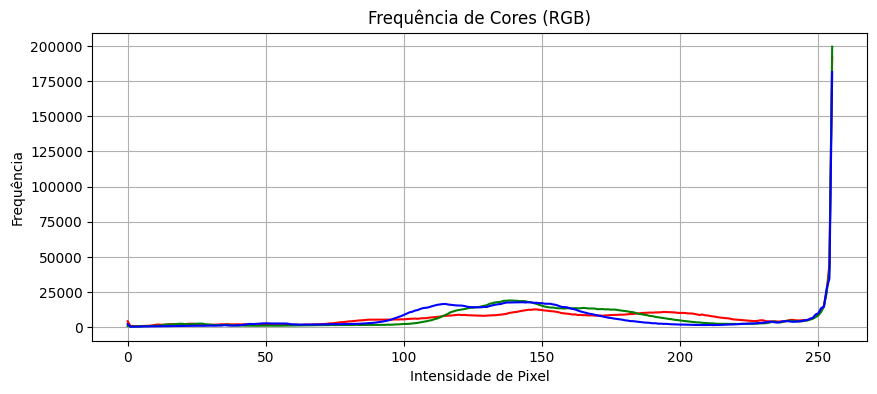

In [27]:
# Parte 1 Carregamento, conversão de cores e histograma
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para carregar e exibir a imagem em RGB
def load_image(filepath):
    image_bgr = cv2.imread(filepath)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    return image_bgr, image_rgb

# Exibir imagem com matplotlib
def show_image(title, image, gray):
    if gray:
        plt.figure(figsize=(6, 6))
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
        plt.show()

# Função para converter em outros espaços de cor
def convert_colors(image_bgr):
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
    return gray, hsv

# Função para plotar histograma
def plot_histogram(image_rgb):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 4))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title('Frequência de Cores (RGB)')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Exemplo de uso
image_path = './D/classifD.jpg'  # coloque o caminho da sua imagem aqui
image_bgr, image_rgb = load_image(image_path)
show_image("Imagem Original (RGB)", image_rgb, False)

gray, hsv = convert_colors(image_bgr)
show_image("Escala de Cinza", gray, True)
show_image("Espaço HSV", cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB), False)  # para exibir no matplotlib

plot_histogram(image_rgb)


In [29]:
print(type(gray))  # Deve ser <class 'numpy.ndarray'>
print(gray[:5])  # Primeiras 5 linhas da matriz
print("Tipos de dados:", gray.dtype)  # Deve ser uint8
print("Altura x Largura:" ,gray.shape)  # Deve ser (altura, largura)

total_pixels = gray.shape[0] * gray.shape[1]
print(f'Total de pixels: {total_pixels}')


<class 'numpy.ndarray'>
[[108 109 108 ... 143 138 116]
 [106 108 110 ... 121 123 133]
 [108 110 112 ... 125 123 134]
 [114 114 112 ... 140 134 126]
 [116 113 109 ... 132 132 131]]
Tipos de dados: uint8
Altura x Largura: (944, 1920)
Total de pixels: 1812480


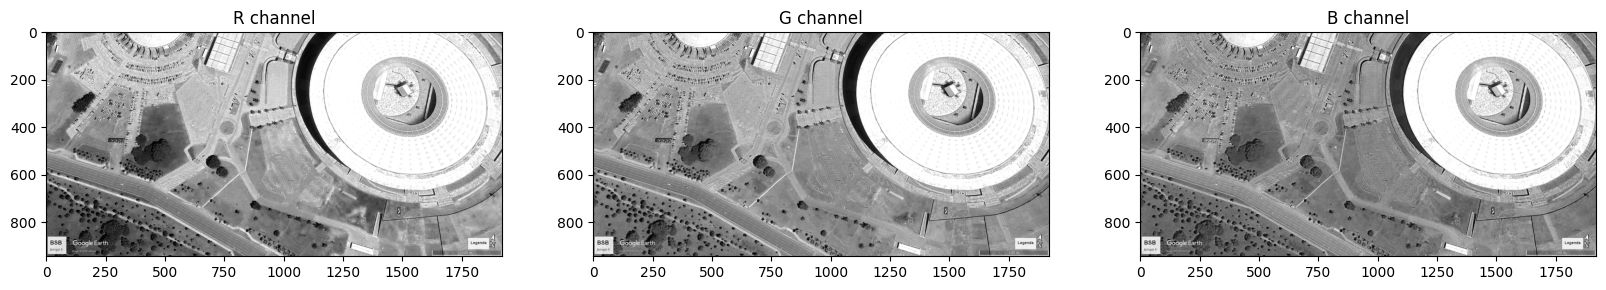

In [30]:
# Isolate RGB channels
r = image_rgb[:,:,0]
g = image_rgb[:,:,1]
b = image_rgb[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

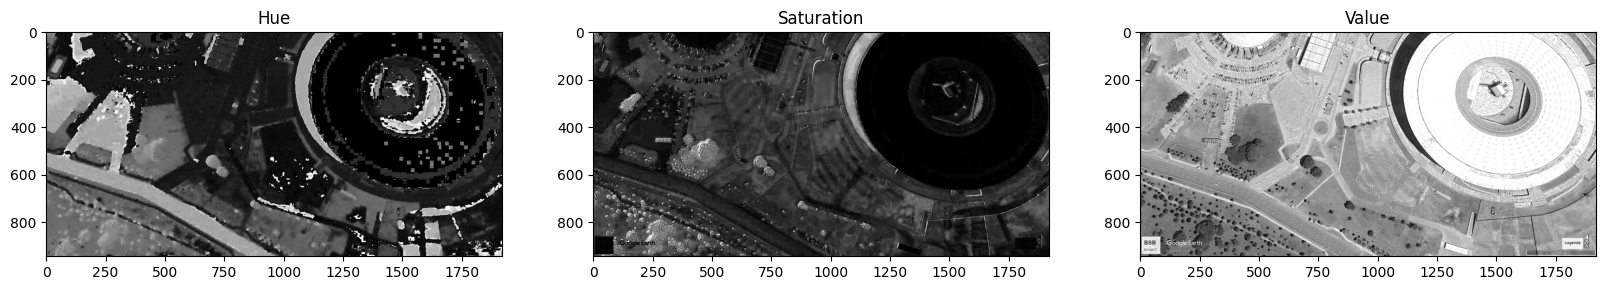

In [64]:

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

In [70]:
# Define our color selection criteria in HSV values
lower_hue = np.array([35,0,0]) 
upper_hue = np.array([85,255,255])

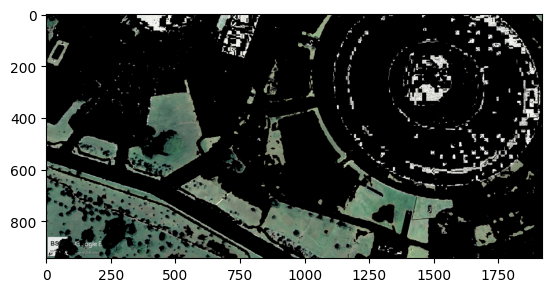

In [71]:

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image_rgb)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

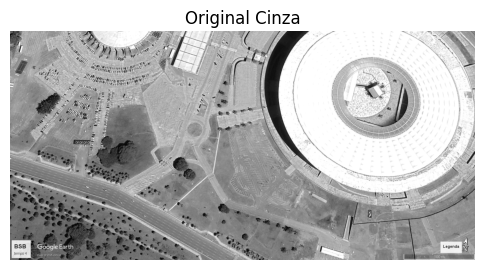

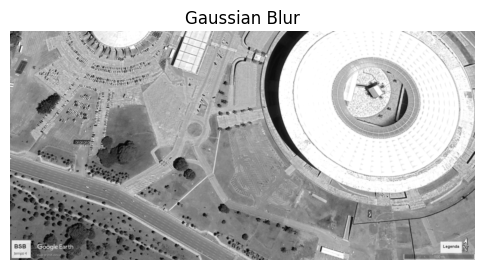

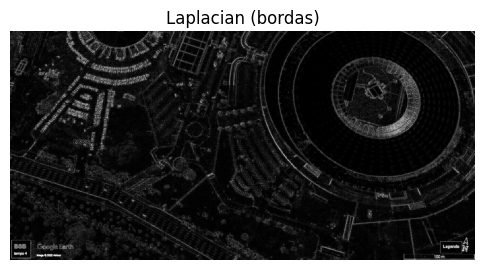

In [37]:
# Parte 2 Filtros - desfoque e realce

def apply_blurs(image):
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    return blur

def apply_laplacian(image_gray):
    laplacian = cv2.Laplacian(image_gray, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    return laplacian

# Aplicação
blur = apply_blurs(np.copy(gray))

show_image("Original Cinza", gray, True)
show_image("Gaussian Blur", blur, True)


lap = apply_laplacian(gray)
show_image("Laplacian (bordas)", lap, True)


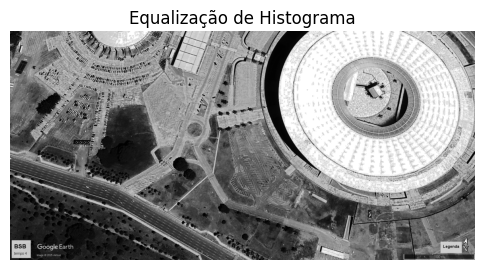

In [40]:
# Parte 2.2 – Aumento de Contraste
def equalize_histogram(image_gray):
    equalized = cv2.equalizeHist(image_gray)
    return equalized

equalized = equalize_histogram(gray)
show_image("Equalização de Histograma", equalized, True)


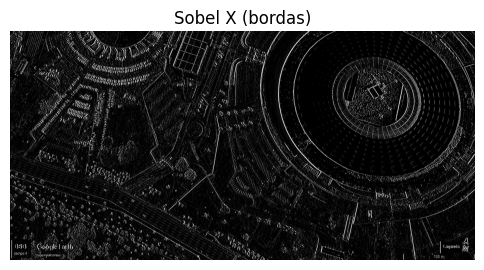

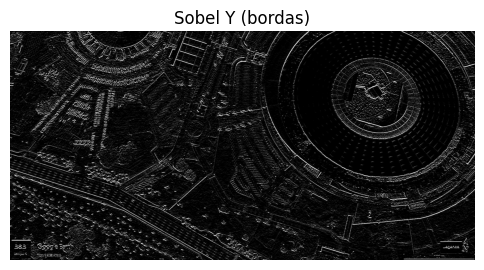

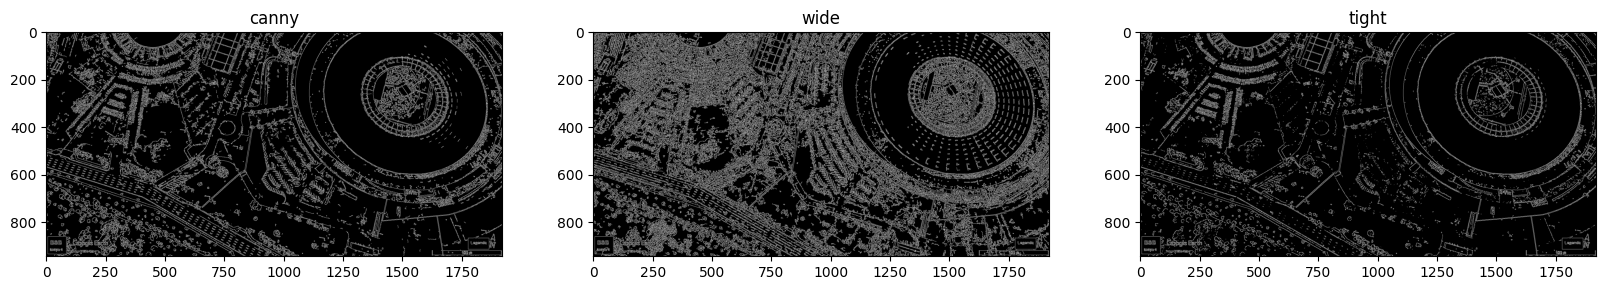

In [52]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator

# 3x3 array for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

filtered_image = cv2.filter2D(gray, -1, sobel_x)



# Parte 3 Detecção de Bordas
def apply_sobel(image_gray):
    sobelx = cv2.filter2D(image_gray, -1, sobel_x)
    sobely = cv2.filter2D(image_gray, -1, sobel_y)
    return sobelx, sobely

def apply_canny(image_gray, threshold1=100, threshold2=200):
    wide = cv2.Canny(image_gray, 30, 100)
    tight = cv2.Canny(image_gray, 200, 240)
    canny = cv2.Canny(image_gray, threshold1, threshold2)
    return canny, wide , tight

sobelx, sobely = apply_sobel(gray)
show_image("Sobel X (bordas)", sobelx, True)
show_image("Sobel Y (bordas)", sobely, True)

canny, wide ,tight = apply_canny(gray)
show_image("Canny", canny, True)
# Display the images
f, (ax1, ax2, ax3) = plt.subplots(1, 2, 3, figsize=(20,10))

ax1.set_title('C')
ax1.imshow(wide, cmap='gray')

ax2.set_title('wide')
ax2.imshow(wide, cmap='gray')

ax3.set_title('tight')
ax3.imshow(tight, cmap='gray')

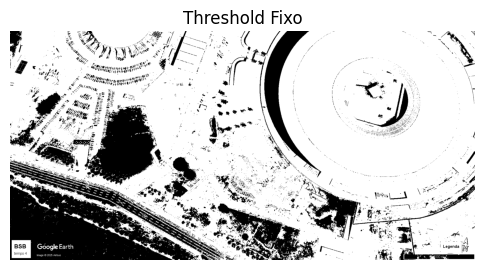

In [62]:
# Parte 4 Threshold e Binarização
def thresholding(image_gray):
    ret1, th = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
    return th

th = thresholding(gray)
show_image("Threshold Fixo", th, True)



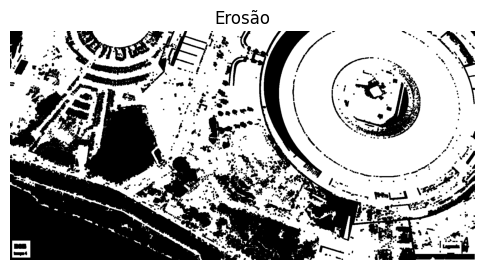

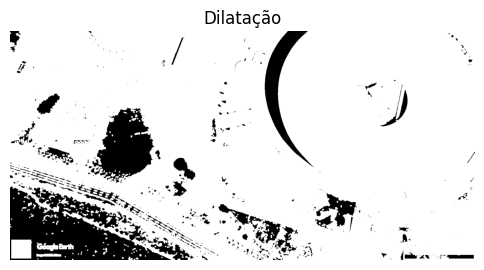

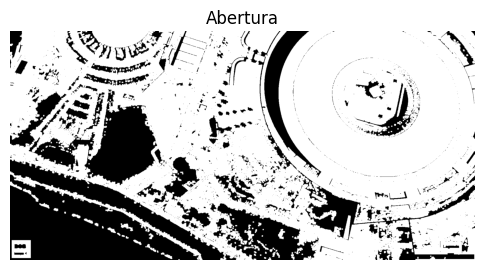

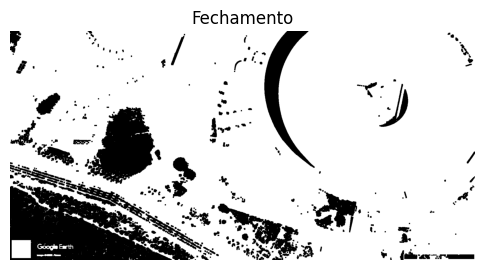

In [63]:
# Parte 5 – Morfologia: Erosão, Dilatação, Abertura, Fechamento
def morphology_ops(image_bin):
    kernel = np.ones((5,5), np.uint8)
    erosion = cv2.erode(image_bin, kernel, iterations=1)
    dilation = cv2.dilate(image_bin, kernel, iterations=1)
    opening = cv2.morphologyEx(image_bin, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)
    return erosion, dilation, opening, closing

erosion, dilation, opening, closing = morphology_ops(th)
show_image("Erosão", erosion, True)
show_image("Dilatação", dilation, True)
show_image("Abertura", opening, True)
show_image("Fechamento", closing, True)


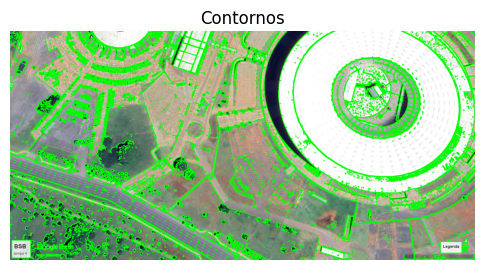

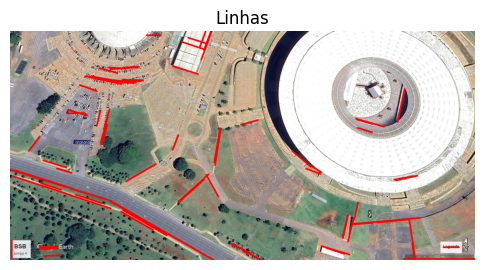

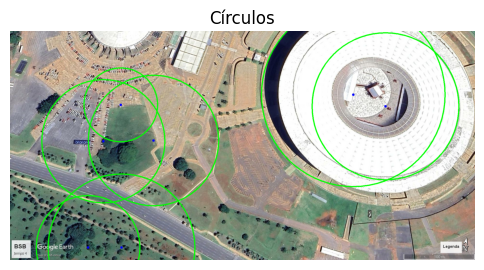

In [109]:
# Parte 6 – Detecção de Formas

def detect_shapes(image_gray, image_rgb):
    edges = cv2.Canny(image_gray, 200, 240)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shapes = image_rgb.copy()
    cv2.drawContours(shapes, contours, -1, (0, 255, 0), 2)
    return shapes, contours

def detect_lines(image_gray, image_rgb):
    edges = cv2.Canny(image_gray, 200, 240)
    rho = 1
    theta = np.pi/180
    threshold = 60
    min_line_length = 60
    max_line_gap = 5
    line_image = np.copy(image_rgb) #creating an image copy to draw lines on
    # Run Hough on the edge-detected image
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)

    # Iterate over the output "lines" and draw lines on the image copy
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    return line_image

def detect_circles(image_gray, image_rgb):

    # Cópia para desenhar os círculos
    circles_im = np.copy(image_rgb)
    
    # Ajustar parâmetros para círculos maiores
    circles = cv2.HoughCircles(
        image_gray, 
        cv2.HOUGH_GRADIENT, 
        dp=1.5,             # Aumentar um pouco para imagens maiores
        minDist=100,        # Maior distância entre centros de círculos
        param1=200,         # Threshold mais alto para Canny
        param2=180,          # Threshold mais permissivo para detecção de círculos
        minRadius=150,      # Aumentar o raio mínimo
        maxRadius=400       # Permitir círculos bem maiores
    )
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Desenhar o círculo externo
            cv2.circle(circles_im, (i[0], i[1]), i[2], (0, 255, 0), 3)
            # Desenhar o centro
            cv2.circle(circles_im, (i[0], i[1]), 5, (0, 0, 255), -1)
    
    return circles_im


shapes_img, contours = detect_shapes(gray, image_rgb)
show_image("Contornos", shapes_img, False)

lines_img = detect_lines(gray,image_rgb)
show_image("Linhas", lines_img, False)

circles_img = detect_circles(tight, image_rgb)
show_image("Círculos", circles_img, False)


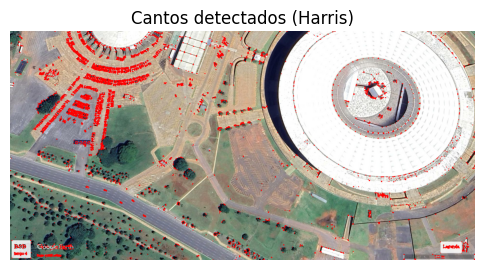

In [111]:
# Parte 7 – Detecção de Canto (Harris)
def detect_corners(image_gray):
    gray_float = np.float32(image_gray)
    corners = cv2.cornerHarris(gray_float, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    corner_img = image_rgb.copy()
    corner_img[corners > 0.01 * corners.max()] = [255, 0, 0]
    return corner_img

corner_img = detect_corners(gray)
show_image("Cantos detectados (Harris)", corner_img, False)


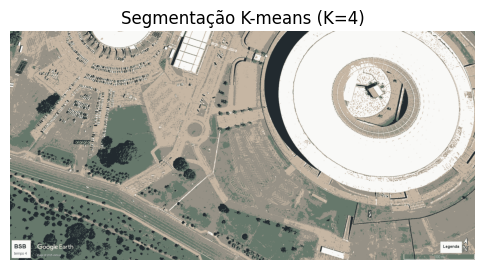

In [117]:
# Parte 8 – Segmentação com K-Means

def kmeans_segmentation(image_rgb, K=3):
    Z = image_rgb.reshape((-1, 3))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented = centers[labels.flatten()]
    segmented_image = segmented.reshape(image_rgb.shape)
    return segmented_image, labels

seg_img, labels = kmeans_segmentation(image_rgb, K=5)
show_image("Segmentação K-means (K=4)", seg_img, False)


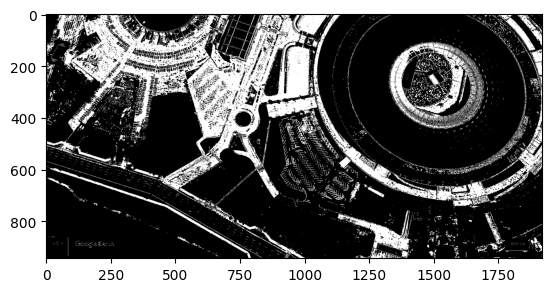

In [119]:
labels_reshape = labels.reshape(seg_img.shape[0], seg_img.shape[1])

plt.imshow(labels_reshape==0, cmap='gray')

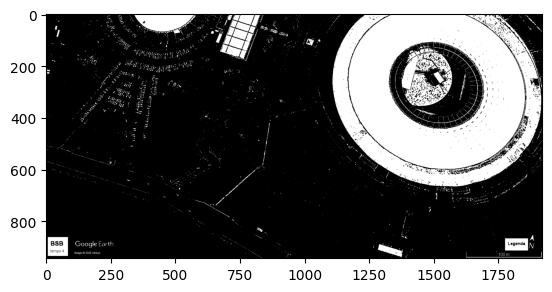

In [121]:

plt.imshow(labels_reshape==1, cmap='gray')


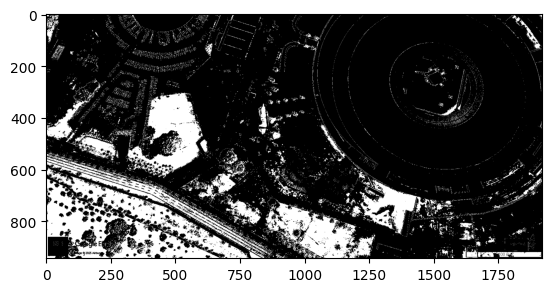

In [122]:

plt.imshow(labels_reshape==2, cmap='gray')
